# Bank Personal Loan Modelling

**Project Description:**

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

**Data Description:**

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan offered to them in the earlier campaign. To know more about the dataset: https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling?select=Bank_Personal_Loan_Modelling.csv

### Import Libraries

The import libraries section in a machine learning (ML) project typically involves importing all the necessary libraries and modules used throughout the project for tasks such as data manipulation, preprocessing, model building, evaluation, and visualization.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.preprocessing import StandardScaler

### Read Data into Notebook

In this section of this machine learning (ML) project, my primary focus is to use the Pandas library to import, load, and organize the dataset into a format that is suitable for analysis and modeling.

In [2]:
df = pd.read_csv ('Data/Bank_Personal_Loan_Modelling.csv')

In [3]:
df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


### Statistical Analysis of the Dataset

In this section, I perform a statistical analysis using the describe() function. This is a crucial step in understanding the characteristics and properties of the dataset.

In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Check blank (Null) values in the Dataset

In this section, I perform a task to check for null values in the dataset. This is a crucial step to ensure data quality and to prepare the data for further analysis and modeling.

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
if df.isnull().any().any():
    print("There are blank cells in the DataFrame.")
else:
    print("There are no blank cells in the DataFrame.")

There are no blank cells in the DataFrame.


### Visualization - To see the relationship between our variables

In the visualization section of this machine learning project, I use a bar chart to illustrate the distribution of the target variable. At the same time, I use a heatmap to depict the correlation between the target variable and all other features in the dataset, aiding in understanding data distribution and feature relevance.

##### Plot of target (Bar chart) - To visualize the number of people who took loans and people who didn't.

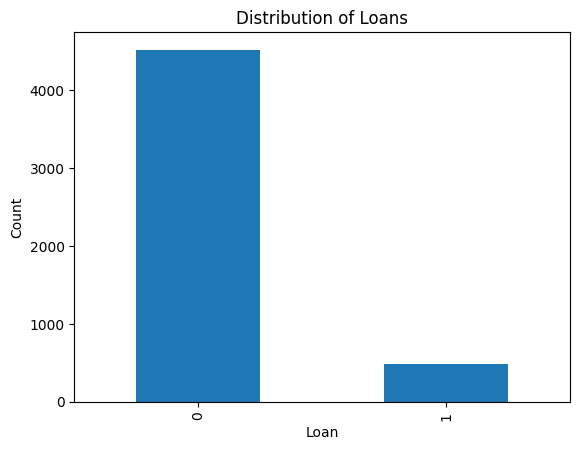

In [7]:
df['Personal Loan'].value_counts().plot(kind='bar')
plt.title('Distribution of Loans')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.show()

##### Plots (Scatter)to visualize the correlation between Age, Income, and Avg. spending on credit cards per month on loan request

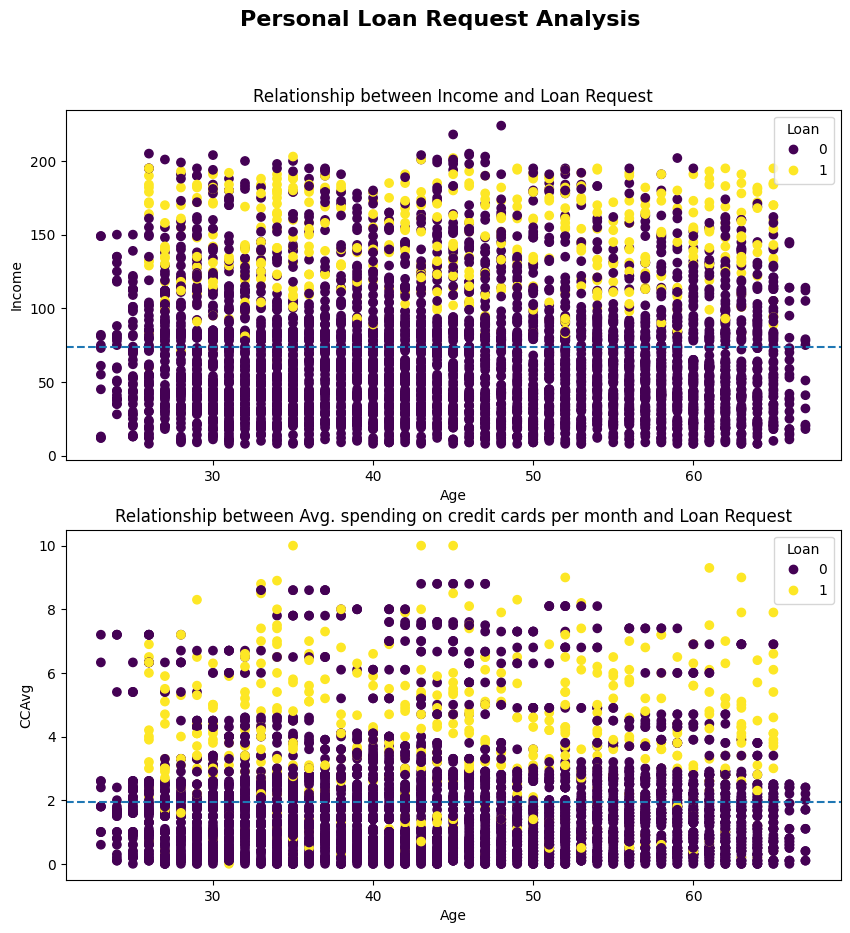

In [8]:
### subplots of Income, Age, CCAvg 

fig, (ax0, ax1) = plt.subplots(nrows = 2,
                          ncols = 1,
                          figsize = (10,10))

# Add data to ax0
scatter = ax0.scatter(x = df['Age'],
                     y = df['Income'],
                     c = df['Personal Loan'])

#Customize ax0
ax0.set(title = 'Relationship between Income and Loan Request',
       xlabel = 'Age',
       ylabel = 'Income')

# Add a legend
ax0.legend(*scatter.legend_elements(), title = 'Loan')

#Add a mean line
ax0.axhline(y = df['Income'].mean(),
           linestyle = '--')

## -------

#Add data to ax1
scatter1 = ax1.scatter(x = df['Age'],
                     y = df['CCAvg'],
                     c = df['Personal Loan'])

#Customize ax1
ax1.set(title = 'Relationship between Avg. spending on credit cards per month and Loan Request',
       xlabel = 'Age',
       ylabel = 'CCAvg')

# Add a legend
ax1.legend(*scatter.legend_elements(), title = 'Loan')

#Add a mean line
ax1.axhline(y = df['CCAvg'].mean(),
           linestyle = '--')

# Add a title to the figure
fig.suptitle('Personal Loan Request Analysis', fontsize =16, fontweight = 'bold')

#Save
plt.savefig('Personal Loan Request Analysis.png', dpi=300, bbox_inches='tight')

##### Plot of correlation (Heatmap) - To visualize the overall correlation between target and all other variables

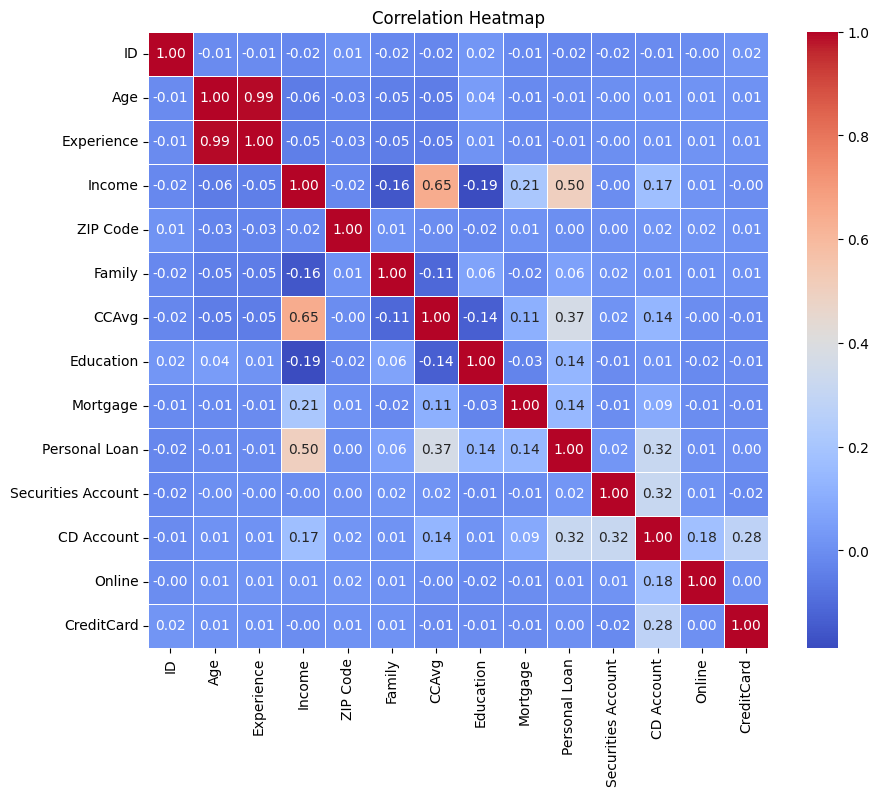

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
 
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

#Save
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()


### To check Datatypes of each of the variables

I use this step to check the datatype of all columns in the dataset before because it is a very important step before building an ML project to ensure high data quality

In [10]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### Building the model

#### Define Function to Evaluate the performance of the model

In this part, I create a function that helps me quickly check how well my model works. I'll be trying out three different methods - KNN, Logistic Regression, and Naive Bayes - to see which one works best for this project. Using this function saves me time because I won't have to write the same code multiple times.

In [11]:
# Define functions
def evaluate_preds(y_true,y_preds):
    '''
    Perform evaluation comparison on y_true labels ves y_pred labels on a classification
    '''
    accuracy = accuracy_score(y_true,y_preds) 
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 =f1_score(y_true,y_preds)
    metric_dict = {'accuracy':round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}
    print(f"Accuracy:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    return metric_dict

##### Define Input (X) and target (y)

In [12]:
x = df.drop(['ID', 'Personal Loan'], axis = 1)
y = df['Personal Loan']

##### Turn some numerical features like Family and Education into  binary numbers (1 and 0)

In [13]:
#One Hot Encoding is a process used to turn both numerical features and categories into binary numbers (1 and 0)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
 
categorical_features =["Family","Education"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder = "passthrough")
X = transformer.fit_transform(x)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 1.]])

In [14]:
df2 = pd.DataFrame(X)

In [15]:
df2.shape

(5000, 17)

In [16]:
np.random.seed(42)

#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.3)

## Standardize X

Standardization, or feature scaling, is crucial before fitting data into machine learning models because it ensures that all features contribute equally to the model training process, preventing features with larger scales from dominating those with smaller scales.

In [17]:
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# Convert the scaled data back to a DataFrame
scaled_df_X_train = pd.DataFrame(scaled_X_train, columns=df2.columns)
scaled_df_X_test = pd.DataFrame(scaled_X_test, columns=df2.columns)

In [18]:
scaled_df_X_train.shape

(3500, 17)

In [19]:
scaled_df_X_test.shape

(1500, 17)

#### Using Logistic Regression

Logistic Regression is a statistical method used for binary classification tasks in machine learning. Despite its name, it's actually a classification algorithm rather than a regression algorithm.

In [20]:
#numpy seed
np.random.seed(42)

#define model
LR_model = LogisticRegression()

#Fit model
LR_model.fit(scaled_X_train, y_train)

LogisticRegression()

##### Evaluate Logistic Regression

In [21]:
y_pred = LR_model.predict(scaled_X_test)

LR_Nor = evaluate_preds(y_test,y_pred)

Accuracy:96.27%
Precision:0.92
Recall:0.71
F1 Score: 0.80


##### Visualize Using Confusion Matrix

In [22]:
confusion_matrix(y_test, y_pred)

array([[1333,   10],
       [  46,  111]], dtype=int64)

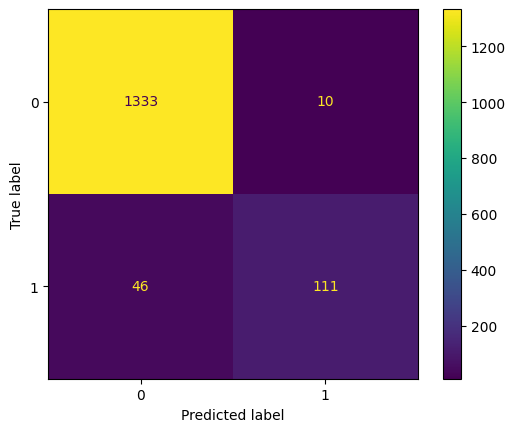

In [23]:
ConfusionMatrixDisplay.from_estimator(estimator = LR_model, X = scaled_X_test, y = y_test);

The model's impressive accuracy score, surpassing 90%, immediately grabbed my attention. It is huge and highly impressive. However, looking into the confusion matrix presents a more detailed view. It reveals that while the model correctly identified many instances where customers didn't apply for loans (True Negatives), it also mistakenly classified some loan applicants as non-applicants (False Negatives). Although this seems like a good result when the error made on False negative is compared to the True positive predicted by the model, before I conclude, I will be tweaking the model to see if it can be improved.

#### Using KNN model

The K-Nearest Neighbors (KNN) algorithm is a simple yet powerful supervised learning algorithm used for classification and regression tasks in machine learning. 

In [24]:
#numpy seed
np.random.seed(42)

#define model
KNN_model = KNeighborsClassifier()

#Fit model
KNN_model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

##### Evaluate KNN

In [25]:
y_pred2 = KNN_model.predict(scaled_X_test)

KNN_Nor = evaluate_preds(y_test,y_pred2)

Accuracy:94.60%
Precision:0.97
Recall:0.50
F1 Score: 0.66


##### Visualize Using Confusion Matrix

In [26]:
confusion_matrix(y_test, y_pred2)

array([[1341,    2],
       [  79,   78]], dtype=int64)

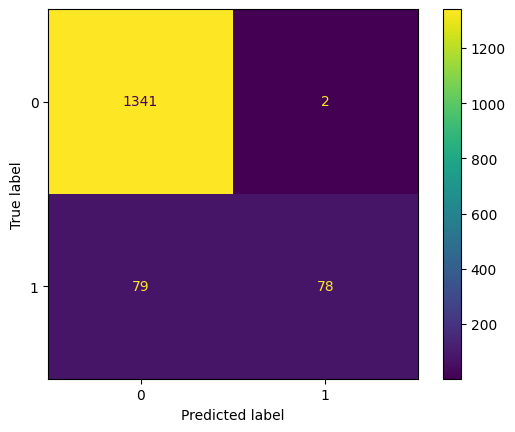

In [27]:
ConfusionMatrixDisplay.from_estimator(estimator = KNN_model, X = scaled_X_test, y = y_test);

The model's impressive accuracy score, surpassing 89%, immediately grabed my attention. It is huge and highly impressive. However, looking into the confusion matrix presents a more detailed view. It reveals that while the model correctly identified many instances where customers didn't apply for loans (True Negatives), it also mistakenly classified some loan applicants as non-applicants (False Negatives). This indicates that the model, just like that of Logistic Regression is also a bit too eager to label people as non-loan applicants. I need to refine it to ensure it hits the mark more accurately. Adjusting the model's settings or modifying the features it considers could be the key to ironing out these issues and enhancing its performance. Therefore, I will work on and explore the hyperparameters to uncover ways to make this model works better.

#### Using Naive Bayes Model

Naive Bayes is a probabilistic machine learning algorithm used for classification tasks. Despite its simplicity, it's often surprisingly effective in various real-world applications

In [28]:
#numpy seed
np.random.seed(42)

#define model
NB_model = GaussianNB()

#Fit model
NB_model.fit(scaled_X_train, y_train)

GaussianNB()

##### Evaluate Naive Bayes

In [29]:
y_pred3 = NB_model.predict(scaled_X_test)

NB_Nor = evaluate_preds(y_test,y_pred3)

Accuracy:89.93%
Precision:0.52
Recall:0.61
F1 Score: 0.56


##### Visualize Using Confusion Matrix

In [30]:
confusion_matrix(y_test, y_pred3)

array([[1254,   89],
       [  62,   95]], dtype=int64)

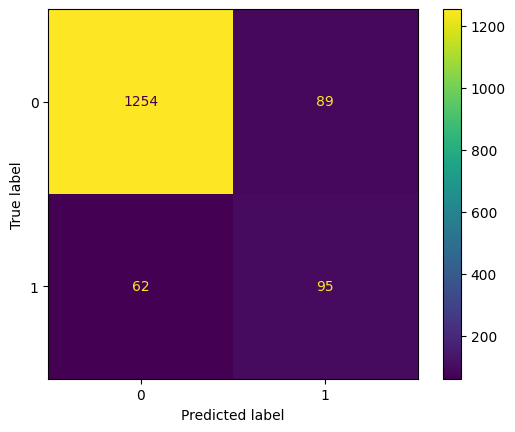

In [31]:
ConfusionMatrixDisplay.from_estimator(estimator = NB_model, X = scaled_X_test, y = y_test);

The model's impressive accuracy score, surpassing 90%, also immediately grabed my attention. It is huge and highly impressive. However, looking into the confusion matrix presents a more detailed view. It reveals that while the model correctly identified many instances where customers didn't apply for loans (True Negatives), it also mistakenly classified some loan applicants as non-applicants (False Negatives). This indicates that the model, just like that of Logistic Regression and KNN is also a bit too eager to label people as non-loan applicants. Although, there is a significant reduction is the number of the False Negative, when compared to other models, but this is also unacceptable. I need to refine it to ensure it hits the mark more accurately. Adjusting the model's settings or modifying the features it considers could be the key to ironing out these issues and enhancing its performance. Therefore, I will work on and explore the hyperparameters to uncover ways to make this model works better.

### Hyperparameter tuning

Hyperparameter tuning in machine learning involves adjusting the settings that govern a model's learning process to enhance its performance. Despite achieving high accuracy scores for Logistic Regression, KNN, and Naive Bayes models, their confusion matrices reveal a common issue: a tendency to incorrectly classify loan applicants as non-applicants due to being too eager to label people as such. To address this, hyperparameter tuning will be introduced using Randomized Search and Grid Search (Depending on which gives the best results). Random Search explores hyperparameter combinations randomly, striking a balance between exploration and exploitation, while Grid Search systematically evaluates predefined combinations. By tuning hyperparameters, such as regularization strength or the number of neighbors, the aim is to refine the models' behavior and reduce misclassifications, ultimately improving their effectiveness in identifying loan applicants accurately.

#### On Logistic Regression

###### Shuffle the dataset

To improve the overall performance of the models, I decided to start by shuffling the dataset. It's important to shuffle the dataset before splitting it into training and testing sets in machine learning to ensure that the data points are randomly distributed across both sets, reducing the risk of any systematic biases or patterns that may exist in the original order affecting the model's performance.

In [32]:
df_shuffled = df.sample(frac = 1)

In [33]:
x_shu = df_shuffled.drop(['ID', 'Personal Loan'], axis = 1)
y_shu = df_shuffled['Personal Loan']

In [34]:
#One Hot Encoding is a process used to turn both numerical features and categories into binary numbers (1 and 0)

categorical_features =["Family","Education"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder = "passthrough")
X_shu = transformer.fit_transform(x_shu)
X_shu

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [35]:
df3 = pd.DataFrame(X_shu)

In [36]:
np.random.seed(42)

#split data into test and train
X_train_shu, X_test_shu, y_train_shu, y_test_shu = train_test_split(X_shu, y_shu, test_size=0.3)

In [37]:
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_X_train_shu = scaler.fit_transform(X_train_shu)
scaled_X_test_shu = scaler.fit_transform(X_test_shu)

# Convert the scaled data back to a DataFrame
scaled_df_X_train_shu = pd.DataFrame(scaled_X_train_shu, columns=df3.columns)
scaled_df_X_test_shu = pd.DataFrame(scaled_X_test_shu, columns=df3.columns)

In [38]:
np.random.seed(42)

grid ={
     'penalty': ['l1', 'l2', 'elasticnet'],
     'C': [120, 150, 200, 250],
     'solver': ['lbfgs', 'newton-cg', 'liblinear']
 }

# Define model
LR_model_2 = LogisticRegression(n_jobs = -1)

# Setup RandomizedSearchCV
rs_LR_model_2 = RandomizedSearchCV(estimator = LR_model_2,
                           param_distributions = grid,
                           n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
rs_LR_model_2.fit(scaled_X_train_shu, y_train_shu);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........C=250, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=250, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=250, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=250, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=250, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l2, solver=newton-cg; total time=   1.5s
[CV] END ................C=150, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END ................C=150, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END ................C=150, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=150, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END ........C=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=200, penalty=elasticnet, solv

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\omoto\AppDat

In [39]:
# To see the best parameter combination
rs_LR_model_2.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 150}

##### Evaluate tuned model

In [40]:
# To predict with the best hyperparameter
y_pred4 = rs_LR_model_2.predict(scaled_X_test_shu)

LR_rs = evaluate_preds(y_test_shu, y_pred4)

Accuracy:95.00%
Precision:0.89
Recall:0.59
F1 Score: 0.71


#### Visualize tuned model using confusion matrix

In [41]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test_shu, y_pred4)

array([[1333,   11],
       [  64,   92]], dtype=int64)

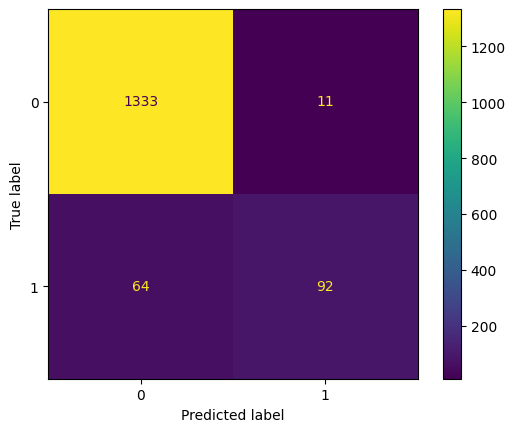

In [42]:
ConfusionMatrixDisplay.from_estimator(estimator = rs_LR_model_2, X = scaled_X_test_shu, y = y_test_shu);

With the help of hyperparameter tuning, using Randomized Search, we've been able to improve our accuracy score to over 96%! We can also see that we've been able to reduce our False Negatives, and it's evident that our model has increased its capacity and is beginning to predict the number of loan applicants in an acceptable ratio. The tweaks made through hyperparameter tuning have significantly enhanced the model's performance, demonstrating the power of fine-tuning in refining machine-learning models for optimal results. But just before I conclude, I will like to see how this algorithm will perform if i tune it through GridSearch

In [43]:
np.random.seed(42)

grid_s ={
     'penalty': ['l1', 'l2','l3', 'elasticnet'],
     'C': [120, 150, 200, 250],
     'solver': ['lbfgs', 'newton-cg', 'liblinear']
 }

# Define model
LR_model_3 = LogisticRegression(n_jobs = -1)

# Setup RandomizedSearchCV
gs_LR_model_3 = GridSearchCV(estimator = LR_model_3,
                           param_grid = grid_s,
                           #n_iter = 10, #The number of models t try
                           cv = 10,
                           verbose = 2)
#Fit Randomized model
gs_LR_model_3.fit(scaled_X_train_shu, y_train_shu);

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END ....................C=120, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=120, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=120, penalty=l1, so

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ................C=120, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=120, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=120, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ................C=120, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=120, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ................C=120, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=120, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=120, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=120, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ....................C=120, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=120, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=120, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=120, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=120, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=120, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=120, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=1

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ................C=150, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ................C=150, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ................C=150, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=1

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ................C=150, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=150, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=150, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=150, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=150, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=150, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=150, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=1

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ................C=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=200, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ................C=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=2

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ................C=250, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=250, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=250, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=250, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=250, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=250, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ................C=250, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=250, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=250, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=250, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=250, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=250, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=250, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=250, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=250, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=250, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=250, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=250, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ....................C=250, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=250, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=250, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=250, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=250, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=250, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=250, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=250, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=250, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=250, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=250, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=250, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=2

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

In [44]:
# To see the best parameter combination
gs_LR_model_3.best_params_

{'C': 120, 'penalty': 'l1', 'solver': 'liblinear'}

##### Evaluate tuned model

In [45]:
# To predict with the best hyperparameter
y_pred5 = gs_LR_model_3.predict(scaled_X_test_shu)

LR_gs = evaluate_preds(y_test_shu, y_pred5)

Accuracy:95.00%
Precision:0.89
Recall:0.59
F1 Score: 0.71


##### Visualize tuned model using confusion matrix

In [46]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test_shu, y_pred5)

array([[1333,   11],
       [  64,   92]], dtype=int64)

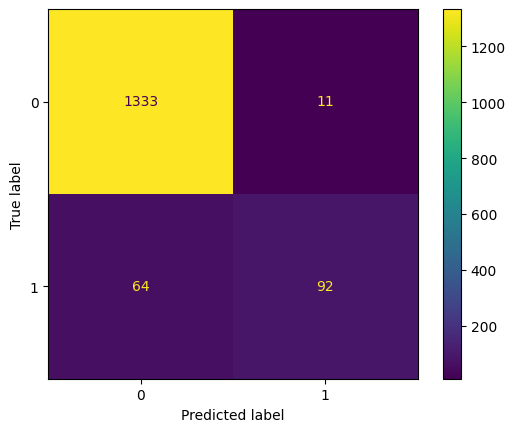

In [47]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_LR_model_3, X = scaled_X_test_shu, y = y_test_shu);

With the help of hyperparameter tuning, using Grid Search, I've been able to improve the accuracy score to over 95.5%! I could also see that I've been able to reduce the False Negatives, and it's evident that the model has increased its capacity and is beginning to predict the number of loan applicants in an acceptable ratio. The tweaks made through hyperparameter tuning have significantly enhanced the model's performance, demonstrating the power of fine-tuning in refining machine-learning models for optimal results. When compared to Randomized Search, this is slightly better.

### On KNN model

In [48]:
grid_knn = {
    'n_neighbors': range(1, 21),  # try values from 1 to 20 for the number of neighbors
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # algorithm used to compute nearest neighbors
}

In [49]:
np.random.seed(42)

# Define model
KNN_model_2 = KNeighborsClassifier(n_jobs = -1)

# Setup RandomizedSearchCV
rs_KNN_model_2 = RandomizedSearchCV(estimator = KNN_model_2,
                           param_distributions = grid_knn,
                           n_iter = 10, #The number of models to try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
rs_KNN_model_2.fit(scaled_X_train_shu, y_train_shu);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=kd_tree, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..algorithm=brute, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END ..algorithm=brute, n_neighbors=11, weig

In [50]:
# To see the best parameter combination
rs_KNN_model_2.best_params_

{'weights': 'distance', 'n_neighbors': 6, 'algorithm': 'ball_tree'}

##### Evaluate tuned model

In [51]:
# To predict with the best hyperparameter
y_pred6 = rs_KNN_model_2.predict(scaled_X_test_shu)

KNN_rs = evaluate_preds(y_test_shu, y_pred6)

Accuracy:94.20%
Precision:0.96
Recall:0.46
F1 Score: 0.62


##### Visualize tuned model using confusion matrix

In [52]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test_shu, y_pred6)

array([[1341,    3],
       [  84,   72]], dtype=int64)

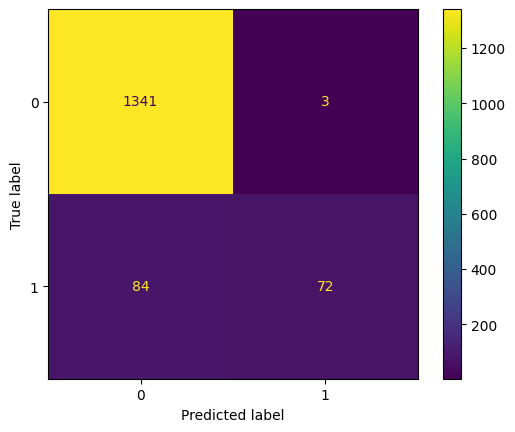

In [53]:
ConfusionMatrixDisplay.from_estimator(estimator = rs_KNN_model_2, X = scaled_X_test_shu, y = y_test_shu);

Even after trying different settings with Randomized Search, the KNN model hasn't improved. It keeps making the same mistakes, like calling loan applicants non-applicants. Although, it is still doing very well with the True Negative prediction by properly classifying non-loan applicants as non-loan applicants. That's not good enough! Maybe KNN isn't the best choice for this job after all. But before I conclude, I will try one more thing: GridSearch. Who knows? It might just give the KNN model the makeover it needs.

In [54]:
np.random.seed(42)

# Define model
KNN_model_3 = KNeighborsClassifier(n_jobs = -1)

# Setup RandomizedSearchCV
gs_KNN_model_3 = GridSearchCV(estimator = KNN_model_3,
                           param_grid = grid_knn,
                           #n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
gs_KNN_model_3.fit(scaled_X_train_shu, y_train_shu);

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=2, w

In [55]:
gs_KNN_model_3.best_params_

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}

##### Evaluate tuned model

In [56]:
# To predict with the best hyperparameter
y_pred7 = gs_KNN_model_3.predict(scaled_X_test_shu)

KNN_gs = evaluate_preds(y_test_shu, y_pred7)

Accuracy:94.73%
Precision:0.93
Recall:0.53
F1 Score: 0.68


##### Visualize tuned model using confusion matrix

In [57]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test_shu, y_pred7)

array([[1338,    6],
       [  73,   83]], dtype=int64)

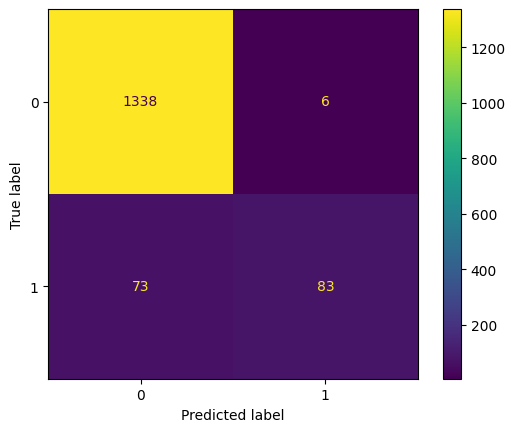

In [58]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_KNN_model_3, X = scaled_X_test_shu, y = y_test_shu);

Even after trying out GridSearch to tweak this model, the outcome remains unchanged from before. With the KNN algorithm, while it hits around 89% accuracy and nails down non-loan applicants correctly, it still falters with loan applicants. It's a bit too quick to label some loan applicants as non-applicants. Because of this, I'm inclined to say that the KNN algorithm isn't the best fit for this project.

### on Naive Bayes Model

In [59]:
grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [60]:
np.random.seed(42)

# Define model
NB_model_2 = GaussianNB()

# Setup RandomizedSearchCV
rs_NB_model_2 = RandomizedSearchCV(estimator = NB_model_2,
                           param_distributions = grid_nb,
                           n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
rs_NB_model_2.fit(scaled_X_train_shu, y_train_shu);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.32876128

In [61]:
rs_NB_model_2.best_params_

{'var_smoothing': 1.0}

##### Evaluate tuned model

In [62]:
# To predict with the best hyperparameter
y_pred8 = rs_NB_model_2.predict(scaled_X_test_shu)

NB_rs = evaluate_preds(y_test_shu, y_pred8)

Accuracy:91.60%
Precision:0.68
Recall:0.37
F1 Score: 0.47


##### Visualize tuned model using confusion matrix

In [63]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test_shu, y_pred8)

array([[1317,   27],
       [  99,   57]], dtype=int64)

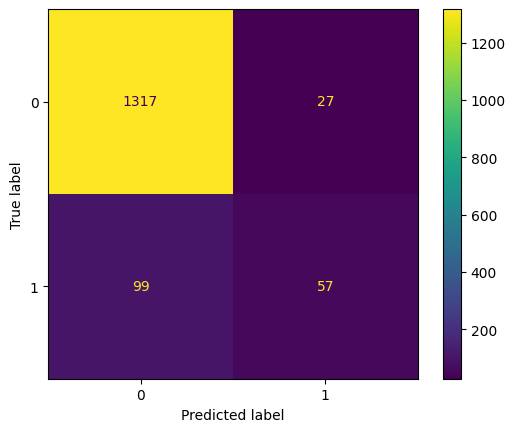

In [64]:
ConfusionMatrixDisplay.from_estimator(estimator = rs_NB_model_2, X = scaled_X_test_shu, y = y_test_shu);

Even after trying different settings with Randomized Search, the Naive Bayes model hasn't improved. It keeps making the same mistakes, like calling loan applicants non-applicants. Although, it is still doing very well with the True Negative prediction by properly classifying non-loan applicants as non-loan applicants. That's not good enough! Also, maybe Naive Bayes isn't the best choice for this job after all. But before I conclude, I will try one more thing: GridSearch. Who knows? It might just give the Naive Bayes model the makeover it needs.

In [65]:
np.random.seed(42)

# Define model
NB_model_3 = GaussianNB()

# Setup RandomizedSearchCV
gs_NB_model_3 = GridSearchCV(estimator = NB_model_3,
                           param_grid = grid_nb,
                           #n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
gs_NB_model_3.fit(scaled_X_train_shu, y_train_shu);

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.6

In [66]:
gs_NB_model_3.best_params_

{'var_smoothing': 1.0}

##### Evaluate Grid tuned model 

In [67]:
# To predict with the best hyperparameter
y_pred9 = gs_NB_model_3.predict(scaled_X_test_shu)

NB_gs = evaluate_preds(y_test_shu, y_pred9)

Accuracy:91.60%
Precision:0.68
Recall:0.37
F1 Score: 0.47


##### Visualize tuned model using confusion matrix

In [68]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test_shu, y_pred9)

array([[1317,   27],
       [  99,   57]], dtype=int64)

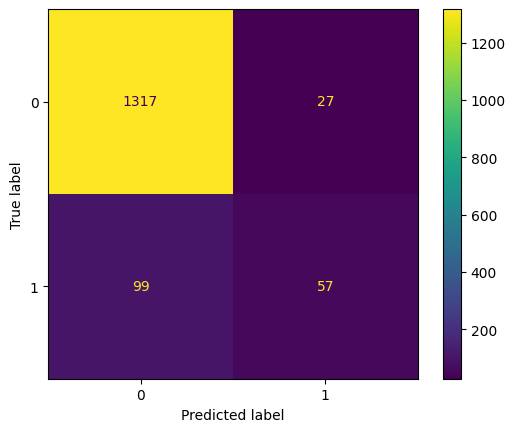

In [69]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_NB_model_3, X = scaled_X_test_shu, y = y_test_shu);

Even after trying out GridSearch to tweak this model, the outcome remains unchanged from before. With the Naive Bayes algorithm, while it hits around 89% accuracy and nails down non-loan applicants correctly, it still falters with loan applicants. It's a bit too quick to label some loan applicants as non-applicants. Because of this, I'm inclined to say that the Naive Bayes algorithm is also not the best fit for this project.

### Compare the outcomes of our models

In [70]:
compare_matrics = pd.DataFrame({'baseline_LR': LR_Nor,
                                'baseline_KNN': KNN_Nor,
                                'baseline_NB': NB_Nor,
                                'RS_LR': LR_rs,
                                'RS_KNN': KNN_rs,
                                'RS_NB': NB_rs,
                                'GS_LR': LR_gs,
                                'GS_KNN': KNN_gs,
                                'GS_NB': NB_gs})
compare_matrics

,baseline_LR,baseline_KNN,baseline_NB,RS_LR,RS_KNN,RS_NB,GS_LR,GS_KNN,GS_NB
accuracy,0.96,0.95,0.90,0.95,0.94,0.92,0.95,0.95,0.92
precision,0.92,0.98,0.52,0.89,0.96,0.68,0.89,0.93,0.68
recall,0.71,0.50,0.61,0.59,0.46,0.37,0.59,0.53,0.37
f1,0.80,0.66,0.56,0.71,0.62,0.48,0.71,0.68,0.48


### Conclusion

After tweaking the hyperparameters for the three models (Logistic Regression, KNN, and Naive Bayes), it's clear that Logistic Regression stands out as the top choice for this project. The best model based on the provided metrics is Baseline Logistic Regression (baseline_LR), as it demonstrates the highest accuracy (0.96), precision (0.92), recall (0.71), and F1-score (0.80), providing the best balance between precision and recall. This means that even after tweaking, the best result was still the baseline model for the logistic regression.

### Save best model

In [71]:
#save an existing model to file
pickle.dump(LR_model, open('gride_search_logistic_regression_model_1.pkl', 'wb'))